# Import required packages

In [10]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')

In [3]:
np.array([10, 11, 12])

array([10, 11, 12])

In [15]:
x = np.linspace(0, 10, 30)
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [70]:
np.array([[1, 2], [4, 5]]) * np.array([[1, 2]]).T

array([[ 1,  2],
       [ 8, 10]])

In [132]:
print(np.array([1,2, 3]) * np.array([10, 11, 12]))
print(np.array([1,2, 3]) * np.array([10, 11, 12]) ** 2)
print(np.sum(np.array([1,2, 3]) * np.array([10, 11, 12])))

[10 22 36]
[100 242 432]
68


# Exercise 1

In [35]:
a_list = list(range(0, 10))
b_list = a_list[1:4]
b_list

b_list[0] = 1000

print("b", b_list)
print("a", a_list)

b [1000, 2, 3]
a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [36]:
a_array = np.arange(0, 10)
b_array = a_array[1:4]
b_array

array([1, 2, 3])

In [37]:
b_array[0] = 1000
print("b", b_array)
print("a", a_array)

b [1000    2    3]
a [   0 1000    2    3    4    5    6    7    8    9]


In [59]:
a_test = np.arange(0, 30).reshape((10, 3))
b_test = a_test[1:4] * 1

b_test[0] = np.array([10, 11, 12])
# b_test[0, 0] = 1000

print(a_test)
print(b_test)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]
 [21 22 23]
 [24 25 26]
 [27 28 29]]
[[10 11 12]
 [ 6  7  8]
 [ 9 10 11]]


# Exercise 2

In [78]:
np.arange(1, 10)[np.newaxis, np.newaxis, ...]

array([[[1, 2, 3, 4, 5, 6, 7, 8, 9]]])

In [79]:
np.arange(1, 10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [96]:
np.arange(1, 10).reshape(-1, 1, 1, 1)

array([[[[1]]],


       [[[2]]],


       [[[3]]],


       [[[4]]],


       [[[5]]],


       [[[6]]],


       [[[7]]],


       [[[8]]],


       [[[9]]]])

True


# Exercise 3

In [109]:
def angle(a, b):
    return np.arccos(np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)))
def radToDeg(rad):
    return rad * 360 / (2 * np.pi)

In [111]:
radToDeg(angle([0, 1, 2], [3, 0, 0]))

90.0

# Exercise 4 - Linear Regression Exercise

## Simulation of mock data 

Suppose the independent variable $x$ and the response variable $y$ follow a linear relationship, i.e.:

$$ y  = \mathbf{\beta}^\top \cdot \mathbf{x} = \beta_0 + \beta_1 x$$

where

$$
\mathbf{\beta}
=
\begin{bmatrix} 
\beta_0 \\
\beta_1
\end{bmatrix} 
\text{     and,    } 
\mathbf{x}
=
\begin{bmatrix} 
1 \\
x
\end{bmatrix} 
$$


$\beta_0$ is the intercept term and $\beta_1$ is the slope term.

We want to create some mock data $(X,Y)$ of $N=1000$ data points with certain amount of Gaussian noise $\epsilon \sim \mathcal{N} (0,1) $.


Where 

$$
X
=
\begin{bmatrix}
\mathbf{x_1}, 
\mathbf{x_2}, 
\cdots,
\mathbf{x_N}
\end{bmatrix}
=
\begin{bmatrix}
1 & 1& & 1\\
& &\cdots &\\
x_1 & x_2& & x_N
\end{bmatrix}
\text{         and ,     }
Y
=
\begin{bmatrix}
y_1,
y_2,
\cdots,
y_N
\end{bmatrix}
$$




and

$$ y_i = \mathbf{\beta}^\top \cdot \mathbf{x}_i + \epsilon_i = \beta_0 + \beta_1 x_i + \epsilon_i $$ for $i=1 \ldots N$


Let's assume $\beta_0 = 3$ and $\beta_1 = 10$.

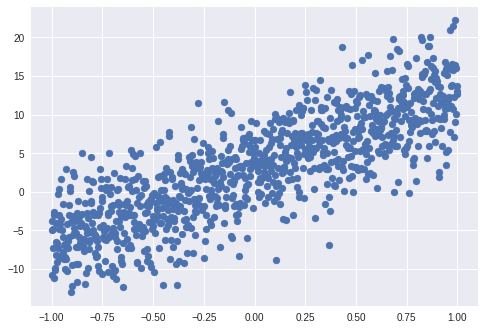

In [4]:
N = 1000 #sample size

true_beta = np.array([3,10])
x = np.linspace(-1,1,N)
x1 = np.vstack([np.ones(x.shape), x])

eps = np.random.normal(0,4,N)

y = np.matmul(true_beta, x1) + eps

plt.scatter(x,y)

## Linear Regression

Suppose that we know $x$ and $y$ follow a linear relationship, but we do not know the value of $\mathbf{\beta}$. 
We want to build a linear model $f(\mathbf{x}; \beta)$ and estimate the value of $\mathbf{\beta}$ from data samples $(x_i,y_i)$, so that given any input $\mathbf{x}_i$, we can make a prediction $\hat{y_i}$:


$$ \hat{y_i} = f(\mathbf{x}_i; \beta) = \mathbf{\beta}^\top \cdot \mathbf{x}_i  = \beta_0 + \beta_1 x_i  $$




Define the mean squared error loss function which measure the error between our predictions and the actual values:

$$ l = \frac{1}{N} \sum_{i=1}^{N} (y_i-\hat{y_i})^2 $$

We can estimate the value of $\beta$ by finding the minimizer which minimizes $l$ using the Newton-Raphson algorithm.

$$
\mathbf{\hat{\beta}}
=
\text{argmin}_\beta \   l(\beta)
$$

## Gradient and Hessian

To use the Newton-Raphson algorithm, we need to calculate the gradient and Hessian of the loss function, which are the first order and second order partial derivatives of the loss function respectively.

### The first order partial derivatives of the loss function are:

$$
\begin{align}
\frac{\partial l}{\partial \beta_0} &= -\frac{2}{N} \sum_{i=1}^N (y_i-\hat{y_i}) \\
\frac{\partial l}{\partial \beta_1} &= -\frac{2}{N} \sum_{i=1}^N x_i \cdot (y_i-\hat{y_i}) 
\end{align}
$$

### The gradient of the loss function is: 

$$
\nabla l
=
\begin{bmatrix} 
\frac{\partial l}{\partial \beta_0} \\ 
\frac{\partial l}{\partial \beta_1}
\end{bmatrix}
= 
-2 \cdot
\begin{bmatrix} 
\frac{1}{N} \sum_{i=1}^N (y_i -\hat{y_i}) \\ 
\frac{1}{N} \sum_{i=1}^N x_i \cdot (y_i -\hat{y_i})
\end{bmatrix}
$$

### The second order partial derivatives of the loss function are:

# $$ 
\begin{align}
\frac{\partial^2 l}{\partial \beta_0^2} &= 2 \\
\frac{\partial^2 l}{\partial \beta_1^2} &=  \frac{2}{N} \sum_{i=1}^N x_i^2 \\
\frac{\partial^2 l}{\partial \beta_0 \partial \beta_1}  
&=  
\frac{\partial^2 l}{\partial \beta_1 \partial \beta_0}
=
\frac{2}{N} \sum_{i=1}^N x_i 
\end{align}
$$

### The Hessian of the loss function is: 

$$ 
H 
= 
\begin{bmatrix} 
\frac{\partial^2 l}{\partial \beta_0^2} & \frac{\partial^2 l}{\partial \beta_0 \partial \beta_1} \\ \frac{\partial^2 l}{\partial \beta_1 \partial \beta_0} & \frac{\partial^2 l}{\partial \beta_1^2} 
\end{bmatrix} 
= 
2 \cdot
\begin{bmatrix}
1 & \frac{1}{N} \sum_{i=1}^N x_i \\
\frac{1}{N} \sum_{i=1}^N x_i & \frac{1}{N} \sum_{i=1}^N x_i^2
\end{bmatrix}
$$

## Newton-Raphson Algorithm (2nd Order Optimization)








Define the functions for our linear model and the loss function

In [5]:
# Define the function for our linear model
def model(param,x1):
    return np.matmul(param, x1)

# Define the function for our loss function
def loss_func(param, x1, y): 
    y_out = model(param, x1)
    return np.sum((y_out - y)**2)/len(y)
# loss_func(np.array([[8, 2]]), np.array([[3, 1], [10, 1]]).T, [30, 40])

Newton-Raphson algorithm:

1. Initialize $\mathbf{\beta}$ by sampling from the standard normal distribution  $\mathcal{N} (0,1)$ 



2. At each iteration $k$, update the parameters $\mathbf{\beta}$ by this equation: \
   $$ \mathbf{\beta_{k+1}} = \mathbf{\beta_k} - H^{-1} \mathbf{\nabla} l(\beta_k) $$
     
     
3. Stop the algorithm when $|l(\beta_{k+1}) - l(\beta_k)| < \text{tolerance}$, we can use a small number, i.e. $10^{-7}$, as our tolerance value 


Hint:
1. You can use np.abs(delta) to compute the absolute value of delta


## Visualizing the result

In [9]:
beta = np.random.normal(0,0.4,2) #initialize beta
tol = 1e-9 #toloerance
delta = 1 #a variable to store the value for l(\beta_{k+1}) - l(\beta_{k}), initialized to be 1

while delta >= tol:
# for i in range(10):
    old_beta = beta
    S = np.sum(x)/len(x)
    H = 2 * np.array([
        [1, S],
        [S, np.sum(x ** 2)/len(x)]
    ])
    y_out = model(beta, x1)
    grad = -2 * np.array([[
        np.sum((y - y_out))/len(y),
        np.sum(x * (y - y_out))/len(y)
    ]]).T
    # beta = beta - np.matmul(np.linalg.inv(H), grad).reshape(-1)
    beta = beta - np.linalg.solve(H, grad).reshape(-1)
    
    print(loss_func(beta, x1, y) - loss_func(old_beta, x1, y))
    delta = np.abs(loss_func(beta, x1, y) - loss_func(old_beta, x1, y))

-45.18454909179824
-1.7763568394002505e-15


The estimated value for beta is: [3.07541637 9.79461185]
The true value for beta is: [ 3 10]


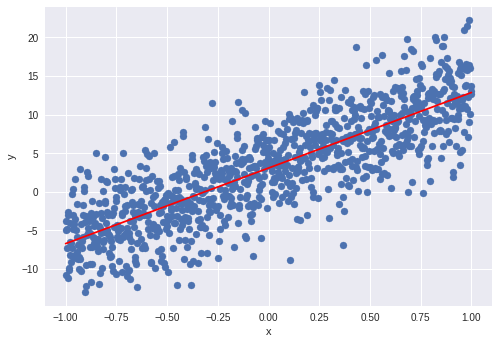

In [8]:
print('The estimated value for beta is:', beta)
print('The true value for beta is:', true_beta)

y_pred = np.matmul(beta,x1)

plt.plot(x, y_pred, 'r')
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

## Gradient Descent Algorithm (1st Order Optimization) [Optional Exercise]

Gradient descent algorithm:


1. Initialize $\mathbf{\beta}$ by sampling from the standard normal distribution  $\mathcal{N} (0,1)$ 



2. At each iteration $k$, update the parameters $\mathbf{\beta}$ by this equation: \
   $$ \mathbf{\beta_{k+1}} = \mathbf{\beta_k} - \alpha \mathbf{\nabla} l(\beta_k) $$
   where $\alpha \sim 10^{-1}$ is the step size



3. Stop the algorithm when $|l(\beta_{k+1}) - l(\beta_k)| < \text{tolerance}$, we can use a small number, i.e. $10^{-7}$, as our tolerance value 



In [3]:
beta = np.random.normal(0,1,2)

alpha = 3e-1
tol = 1e-7
delta = 1

while delta >= tol:
# for i in range(10):
    old_beta = beta
    # S = np.sum(x)/len(x)
    # H = 2 * np.array([
    #     [1, S],
    #     [S, np.sum(x ** 2)/len(x)]
    # ])
    y_out = model(beta, x1)
    grad = -2 * np.array([[
        np.sum((y - y_out))/len(y),
        np.sum(x * (y - y_out))/len(y)
    ]])
    print(beta)
    # beta = beta - np.matmul(np.linalg.inv(H), grad).reshape(-1)
    beta = beta - (alpha * grad)[0]
    
    print(loss_func(beta, x1, y) - loss_func(old_beta, x1, y))
    delta = np.abs(loss_func(beta, x1, y) - loss_func(old_beta, x1, y))

NameError: name 'model' is not defined

## Visualizing the result

The estimated value for beta is: [ 3.11336739 10.14346732]
The true value for beta is: [ 3 10]


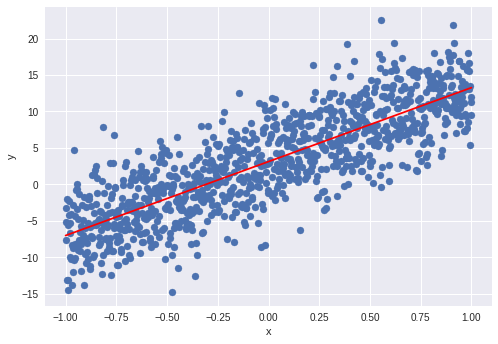

In [163]:
print('The estimated value for beta is:', beta)
print('The true value for beta is:', true_beta)

y_pred = np.matmul(beta,x1)

plt.plot(x, y_pred, 'r')
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()